This notebook produces figures 13 and 14 from de Sá, Rocha et al. (2024).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.cosmology import WMAP9 as cosmo
from scipy.optimize import newton
import matplotlib.cm as cm

In [6]:
plt.style.use('./plotstyle.mplstyle')
FIGURE_FOLDER = Path('./figures')
MRATE_FOLDER = Path('./merger_rate_npy')

In [7]:
def get_peak_t_r(rates, times):
    peak_i = np.argmax(rates)
    peak_r = rates[peak_i]
    peak_t = (times[peak_i+1] + times[peak_i])/2
    return peak_t, peak_r

In [8]:
def _redshift(age):
    z = newton(lambda z: age - cosmo.age(z).value,0.5)
    return z
redshift = np.vectorize(_redshift)

# Full sample

In [19]:
model_id = '2222'
bhbh_mrates_2222 = np.load(MRATE_FOLDER/f'{model_id}_bhbh_mrates_full.npy')
bhbh_edges_2222 = np.load(MRATE_FOLDER/f'{model_id}_bhbh_edges_full.npy')
bhns_mrates_2222 = np.load(MRATE_FOLDER/f'{model_id}_bhns_mrates_full.npy')
bhns_edges_2222 = np.load(MRATE_FOLDER/f'{model_id}_bhns_edges_full.npy')
nsns_mrates_2222 = np.load(MRATE_FOLDER/f'{model_id}_nsns_mrates_full.npy')
nsns_edges_2222 = np.load(MRATE_FOLDER/f'{model_id}_nsns_edges_full.npy')

In [20]:
model_id = '1122'
bhbh_mrates_1122 = np.load(MRATE_FOLDER/f'{model_id}_bhbh_mrates_full.npy')
bhbh_edges_1122 = np.load(MRATE_FOLDER/f'{model_id}_bhbh_edges_full.npy')
bhns_mrates_1122 = np.load(MRATE_FOLDER/f'{model_id}_bhns_mrates_full.npy')
bhns_edges_1122 = np.load(MRATE_FOLDER/f'{model_id}_bhns_edges_full.npy')
nsns_mrates_1122 = np.load(MRATE_FOLDER/f'{model_id}_nsns_mrates_full.npy')
nsns_edges_1122 = np.load(MRATE_FOLDER/f'{model_id}_nsns_edges_full.npy')

In [21]:
bhbh_peak_t_2222, bhbh_peak_r_2222 = get_peak_t_r(bhbh_mrates_2222, bhbh_edges_2222)
bhns_peak_t_2222, bhns_peak_r_2222 = get_peak_t_r(bhns_mrates_2222, bhns_edges_2222)
nsns_peak_t_2222, nsns_peak_r_2222 = get_peak_t_r(nsns_mrates_2222, nsns_edges_2222)

bhbh_peak_t_1122, bhbh_peak_r_1122 = get_peak_t_r(bhbh_mrates_1122, bhbh_edges_1122)
bhns_peak_t_1122, bhns_peak_r_1122 = get_peak_t_r(bhns_mrates_1122, bhns_edges_1122)
nsns_peak_t_1122, nsns_peak_r_1122 = get_peak_t_r(nsns_mrates_1122, nsns_edges_1122)

In [22]:
bhbh_peak_z_2222 = redshift(bhbh_peak_t_2222)
bhns_peak_z_2222 = redshift(bhns_peak_t_2222)
nsns_peak_z_2222 = redshift(nsns_peak_t_2222)

bhbh_peak_z_1122 = redshift(bhbh_peak_t_1122)
bhns_peak_z_1122 = redshift(bhns_peak_t_1122)
nsns_peak_z_1122 = redshift(nsns_peak_t_1122)

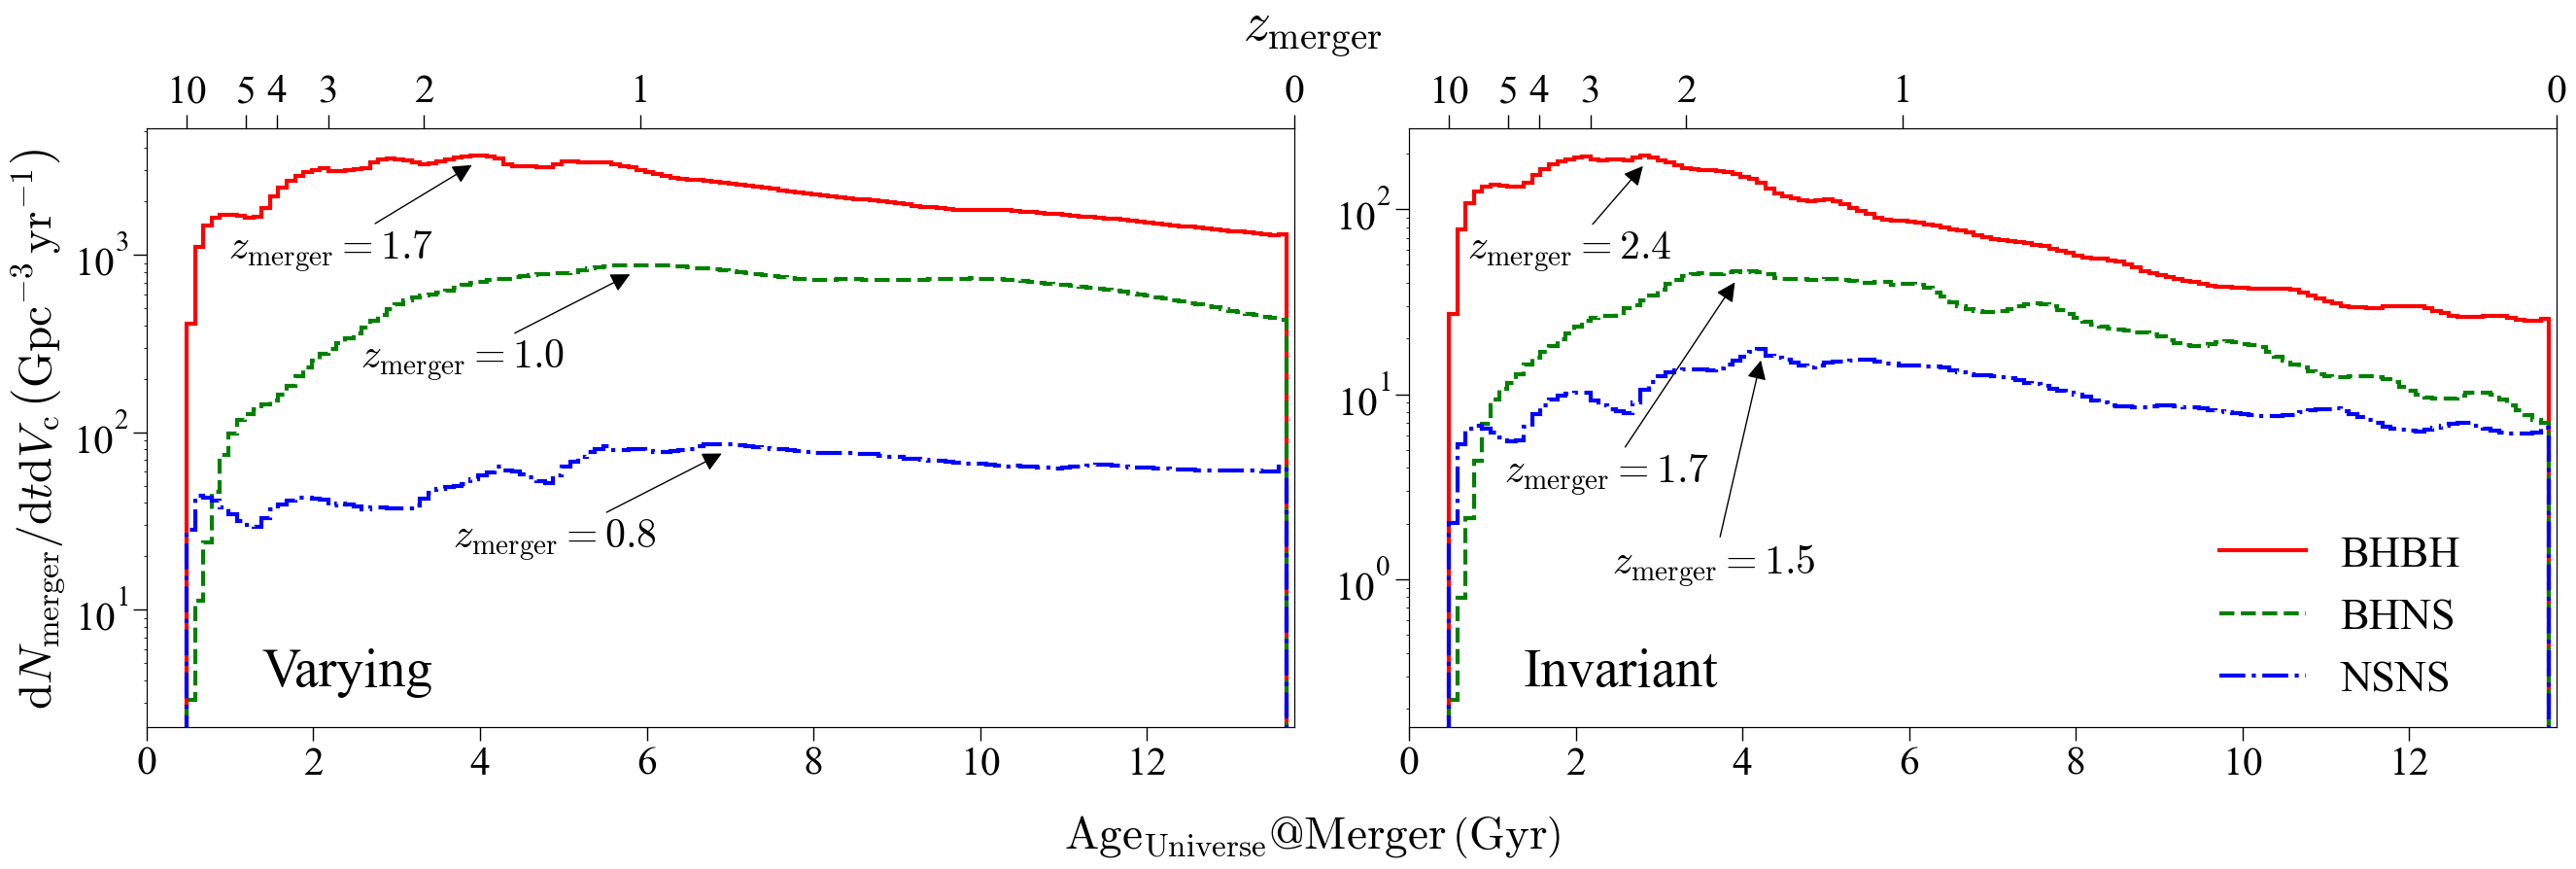

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(32, 8))
ax0, ax1 = axes.flatten()
plt.subplots_adjust(wspace=0.1, hspace=0)

ynorm = 1e0
ax0.stairs(bhbh_mrates_2222, bhbh_edges_2222, color='r', ls='-', lw=3, label='BHBH')
ax0.stairs(bhns_mrates_2222, bhns_edges_2222, color='g', ls='--', lw=3, label='BHNS')
ax0.stairs(nsns_mrates_2222, nsns_edges_2222, color='b', ls='-.', lw=3, label='NSNS')

ax1.stairs(bhbh_mrates_1122, bhbh_edges_1122, color='r', ls='-', lw=3, label='BHBH')
ax1.stairs(bhns_mrates_1122, bhns_edges_1122, color='g', ls='--', lw=3, label='BHNS')
ax1.stairs(nsns_mrates_1122, nsns_edges_1122, color='b', ls='-.', lw=3, label='NSNS')
ax1.legend(frameon=False, loc='lower right', bbox_to_anchor=(0.95,-0.02), fontsize=32)

ax0.set_yscale('log')
ax1.set_yscale('log')
#ax.set_ylim(3e0,2e1)

y_norm = 1
y_norm_label = ''
if y_norm != 1:
    y_norm_label = f'10^{{{np.log10(y_norm):.0f}}}'
fig.text(0.5, 0, '$\\mathrm{Age}_\\mathrm{Universe}@\\mathrm{Merger}\\,\\left(\\mathrm{Gyr}\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=34)
ax0.set_ylabel('$\\mathrm{d}N_\\mathrm{merger}/\\mathrm{d}t\\mathrm{d}V_\\mathrm{c}\\,\\left(\\mathrm{Gpc}^{-3}\\,\\mathrm{yr}^{-1}\\right)$', fontsize=34)

ax0.set_xlim(0, cosmo.age(0).value)
ax1.set_xlim(0, cosmo.age(0).value)

#ax0.set_xticks([])


axx12 = ax1.twiny()
axx12.set_xlim(0, cosmo.age(0).value)
zticks = [10, 5, 4, 3, 2, 1, 0]
tticks = [cosmo.age(z).value for z in zticks]
axx12.set_xticks(tticks)
axx12.set_xticklabels(zticks)

axx02 = ax0.twiny()
axx02.set_xlim(0, cosmo.age(0).value)
zticks = [10, 5, 4, 3, 2, 1, 0]
tticks = [cosmo.age(z).value for z in zticks]
axx02.set_xticks(tticks)
axx02.set_xticklabels(zticks)

ax0.tick_params(axis='both', labelsize=30)
ax1.tick_params(axis='both', labelsize=30)
axx02.tick_params(axis='both', labelsize=30)
axx12.tick_params(axis='both', labelsize=30)

fig.text(0.5, 0.97, '$z_\\mathrm{merger}$', ha='center', va='bottom', transform=fig.transFigure, fontsize=40)

ax0.text(0.1, 0.05, 'Varying', ha='left', va='bottom', transform=ax0.transAxes, fontsize=40)
ax1.text(0.1, 0.05, 'Invariant', ha='left', va='bottom', transform=ax1.transAxes, fontsize=40)

ax0.annotate(f'$z_\\mathrm{{merger}}={bhbh_peak_z_2222:.1f}$', xy=(bhbh_peak_t_2222, bhbh_peak_r_2222*0.9), xytext=(-30, -70), textcoords='offset points', transform=ax0.transAxes,
            arrowprops=dict(arrowstyle='-|>', fc='k'), ha='right')
ax0.annotate(f'$z_\\mathrm{{merger}}={bhns_peak_z_2222:.1f}$', xy=(bhns_peak_t_2222, bhns_peak_r_2222*0.9), xytext=(-50, -70), textcoords='offset points', transform=ax0.transAxes,
            arrowprops=dict(arrowstyle='-|>', fc='k'), ha='right')
ax0.annotate(f'$z_\\mathrm{{merger}}={nsns_peak_z_2222:.1f}$', xy=(nsns_peak_t_2222, nsns_peak_r_2222*0.9), xytext=(-50, -70), textcoords='offset points', transform=ax0.transAxes,
            arrowprops=dict(arrowstyle='-|>', fc='k'), ha='right')

ax1.annotate(f'$z_\\mathrm{{merger}}={bhbh_peak_z_1122:.1f}$', xy=(bhbh_peak_t_1122, bhbh_peak_r_1122*0.9), xytext=(20, -70), textcoords='offset points', transform=ax1.transAxes,
            arrowprops=dict(arrowstyle='-|>', fc='k'), ha='right')
ax1.annotate(f'$z_\\mathrm{{merger}}={bhns_peak_z_1122:.1f}$', xy=(bhns_peak_t_1122, bhns_peak_r_1122*0.9), xytext=(-20, -150), textcoords='offset points', transform=ax1.transAxes,
            arrowprops=dict(arrowstyle='-|>', fc='k'), ha='right')
ax1.annotate(f'$z_\\mathrm{{merger}}={nsns_peak_z_1122:.1f}$', xy=(nsns_peak_t_1122, nsns_peak_r_1122*0.9), xytext=(40, -160), textcoords='offset points', transform=ax1.transAxes,
            arrowprops=dict(arrowstyle='-|>', fc='k'), ha='right')

plt.savefig(FIGURE_FOLDER/'allmergers_mrates.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'allmergers_mrates.eps', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'allmergers_mrates.png', bbox_inches='tight')

In [24]:
print('\n'.join([f'In the 2222 model, local merger rates were:',
                f'BHBH {bhbh_mrates_2222[-1]} within {redshift(bhbh_edges_2222[-2:])}',
                f'BHNS {bhns_mrates_2222[-1]} within {redshift(bhns_edges_2222[-2:])}',
                f'NSNS {nsns_mrates_2222[-1]} within {redshift(nsns_edges_2222[-2:])}']))
print('\n'.join([f'In the 1122 model, local merger rates were:',
                f'BHBH {bhbh_mrates_1122[-1]} within {redshift(bhbh_edges_1122[-2:])}',
                f'BHNS {bhns_mrates_1122[-1]} within {redshift(bhns_edges_1122[-2:])}',
                f'NSNS {nsns_mrates_1122[-1]} within {redshift(nsns_edges_1122[-2:])}']))

In the 2222 model, local merger rates were:
BHBH 1314.4024658203125 within [0.01358125 0.00639008]
BHNS 432.5034484863281 within [0.01358125 0.00639008]
NSNS 64.04609680175781 within [0.01358125 0.00639008]
In the 1122 model, local merger rates were:
BHBH 25.4813232421875 within [0.01358125 0.00639008]
BHNS 6.98449182510376 within [0.01358125 0.00639008]
NSNS 6.5953521728515625 within [0.01358125 0.00639008]


# Per BH mass bin

In [25]:
merger_class = 'BHBH'

In [26]:
model_id = '2222'
merger_class = 'BHBH'

bhbh_mrates_to10_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_to10.npy')
bhbh_edges_to10_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_to10.npy')

bhbh_mrates_10to20_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_10to20.npy')
bhbh_edges_10to20_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_10to20.npy')

bhbh_mrates_20to30_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_20to30.npy')
bhbh_edges_20to30_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_20to30.npy')

bhbh_mrates_30on_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_30on.npy')
bhbh_edges_30on_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_30on.npy')

merger_class = 'BHNS'

bhns_mrates_to3_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_to3.npy')
bhns_edges_to3_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_to3.npy')

bhns_mrates_3to5_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_3to5.npy')
bhns_edges_3to5_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_3to5.npy')

bhns_mrates_5to10_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_5to10.npy')
bhns_edges_5to10_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_5to10.npy')

bhns_mrates_10to20_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_10to20.npy')
bhns_edges_10to20_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_10to20.npy')

bhns_mrates_20on_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_20on.npy')
bhns_edges_20on_2222 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_20on.npy')

In [27]:
model_id = '1122'
merger_class = 'BHBH'

bhbh_mrates_to10_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_to10.npy')
bhbh_edges_to10_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_to10.npy')

bhbh_mrates_10to20_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_10to20.npy')
bhbh_edges_10to20_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_10to20.npy')

bhbh_mrates_20to30_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_20to30.npy')
bhbh_edges_20to30_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_20to30.npy')

bhbh_mrates_30on_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_30on.npy')
bhbh_edges_30on_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_30on.npy')

merger_class = 'BHNS'

bhns_mrates_to3_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_to3.npy')
bhns_edges_to3_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_to3.npy')

bhns_mrates_3to5_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_3to5.npy')
bhns_edges_3to5_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_3to5.npy')

bhns_mrates_5to10_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_5to10.npy')
bhns_edges_5to10_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_5to10.npy')

bhns_mrates_10to20_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_10to20.npy')
bhns_edges_10to20_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_10to20.npy')

bhns_mrates_20on_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_mrates_20on.npy')
bhns_edges_20on_1122 = np.load(MRATE_FOLDER/f'{model_id}_{merger_class.lower()}_edges_20on.npy')

In [28]:
bhbh_to10_peak_t_2222, bhbh_to10_peak_r_2222 = get_peak_t_r(bhbh_mrates_to10_2222, bhbh_edges_to10_2222)
bhbh_10to20_peak_t_2222, bhbh_10to20_peak_r_2222 = get_peak_t_r(bhbh_mrates_10to20_2222, bhbh_edges_10to20_2222)
bhbh_20to30_peak_t_2222, bhbh_20to30_peak_r_2222 = get_peak_t_r(bhbh_mrates_20to30_2222, bhbh_edges_20to30_2222)
bhbh_30on_peak_t_2222, bhbh_30on_peak_r_2222 = get_peak_t_r(bhbh_mrates_30on_2222, bhbh_edges_30on_2222)

bhbh_to10_peak_t_1122, bhbh_to10_peak_r_1122 = get_peak_t_r(bhbh_mrates_to10_1122, bhbh_edges_to10_1122)
bhbh_10to20_peak_t_1122, bhbh_10to20_peak_r_1122 = get_peak_t_r(bhbh_mrates_10to20_1122, bhbh_edges_10to20_1122)
bhbh_20to30_peak_t_1122, bhbh_20to30_peak_r_1122 = get_peak_t_r(bhbh_mrates_20to30_1122, bhbh_edges_20to30_1122)
bhbh_30on_peak_t_1122, bhbh_30on_peak_r_1122 = get_peak_t_r(bhbh_mrates_30on_1122, bhbh_edges_30on_1122)

In [29]:
bhns_to3_peak_t_2222, bhns_to3_peak_r_2222 = get_peak_t_r(bhns_mrates_to3_2222, bhns_edges_to3_2222)
bhns_3to5_peak_t_2222, bhns_3to5_peak_r_2222 = get_peak_t_r(bhns_mrates_3to5_2222, bhns_edges_3to5_2222)
bhns_5to10_peak_t_2222, bhns_5to10_peak_r_2222 = get_peak_t_r(bhns_mrates_5to10_2222, bhns_edges_5to10_2222)
bhns_10to20_peak_t_2222, bhns_10to20_peak_r_2222 = get_peak_t_r(bhns_mrates_10to20_2222, bhns_edges_10to20_2222)
bhns_20on_peak_t_2222, bhns_20on_peak_r_2222 = get_peak_t_r(bhns_mrates_20on_2222, bhns_edges_20on_2222)

bhns_to3_peak_t_1122, bhns_to3_peak_r_1122 = get_peak_t_r(bhns_mrates_to3_1122, bhns_edges_to3_1122)
bhns_3to5_peak_t_1122, bhns_3to5_peak_r_1122 = get_peak_t_r(bhns_mrates_3to5_1122, bhns_edges_3to5_1122)
bhns_5to10_peak_t_1122, bhns_5to10_peak_r_1122 = get_peak_t_r(bhns_mrates_5to10_1122, bhns_edges_5to10_1122)
bhns_10to20_peak_t_1122, bhns_10to20_peak_r_1122 = get_peak_t_r(bhns_mrates_10to20_1122, bhns_edges_10to20_1122)
bhns_20on_peak_t_1122, bhns_20on_peak_r_1122 = get_peak_t_r(bhns_mrates_20on_1122, bhns_edges_20on_1122)

In [30]:
bhbh_to10_peak_z_2222 = redshift(bhbh_to10_peak_t_2222)
bhbh_10to20_peak_z_2222 = redshift(bhbh_10to20_peak_t_2222)
bhbh_20to30_peak_z_2222 = redshift(bhbh_20to30_peak_t_2222)
bhbh_30on_peak_z_2222 = redshift(bhbh_30on_peak_t_2222)

bhbh_to10_peak_z_1122 = redshift(bhbh_to10_peak_t_1122)
bhbh_10to20_peak_z_1122 = redshift(bhbh_10to20_peak_t_1122)
bhbh_20to30_peak_z_1122 = redshift(bhbh_20to30_peak_t_1122)
bhbh_30on_peak_z_1122 = redshift(bhbh_30on_peak_t_1122)

In [31]:
bhns_to3_peak_z_2222 = redshift(bhns_to3_peak_t_2222)
bhns_3to5_peak_z_2222 = redshift(bhns_3to5_peak_t_2222)
bhns_5to10_peak_z_2222 = redshift(bhns_5to10_peak_t_2222)
bhns_10to20_peak_z_2222 = redshift(bhns_10to20_peak_t_2222)
bhns_20on_peak_z_2222 = redshift(bhns_20on_peak_t_2222)

bhns_to3_peak_z_1122 = redshift(bhns_to3_peak_t_1122)
bhns_3to5_peak_z_1122 = redshift(bhns_3to5_peak_t_1122)
bhns_5to10_peak_z_1122 = redshift(bhns_5to10_peak_t_1122)
bhns_10to20_peak_z_1122 = redshift(bhns_10to20_peak_t_1122)
bhns_20on_peak_z_1122 = redshift(bhns_20on_peak_t_1122)

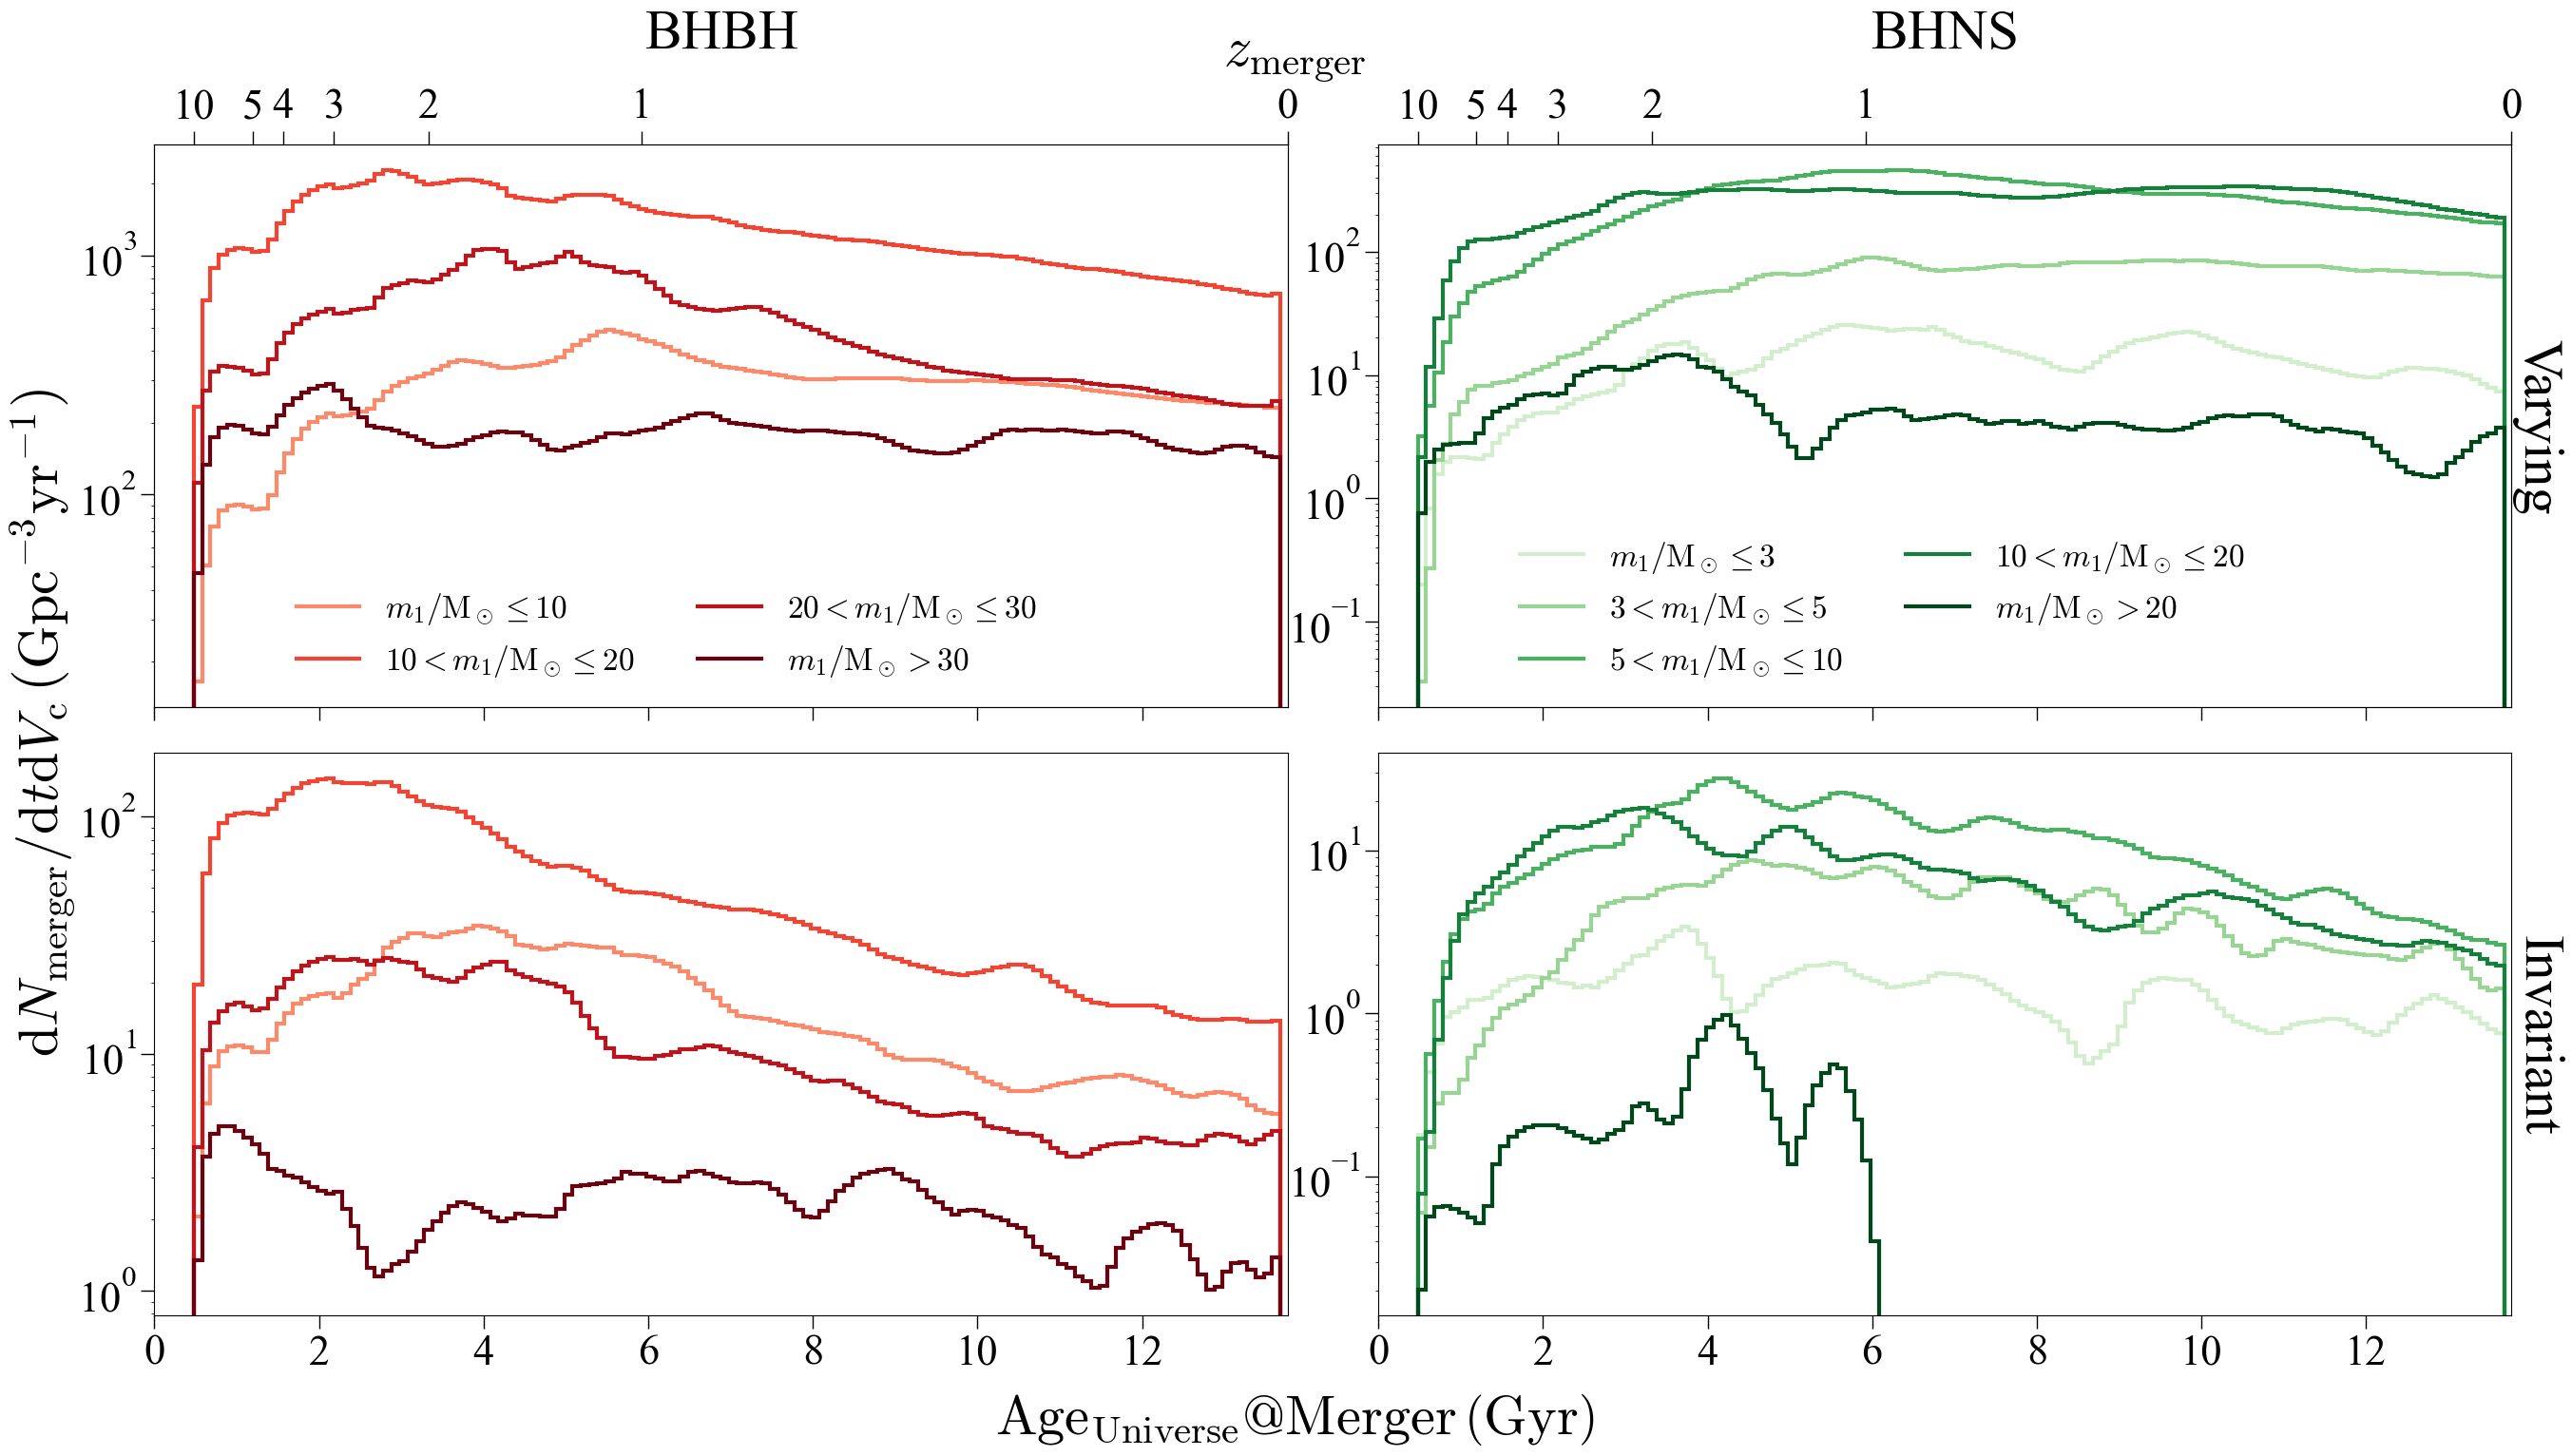

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(32, 16), sharex=True)
[[ax2222_bhbh, ax2222_bhns], [ax1122_bhbh, ax1122_bhns]] = axes
plt.subplots_adjust(wspace=0.08, hspace=0.08)

### BHBH ###
merger_class = 'BHBH'
cmap = plt.get_cmap('Reds')

ax2222_bhbh.stairs(bhbh_mrates_to10_2222, bhbh_edges_to10_2222, color=cmap(0.4), ls='-', lw=3, label='$m_1/\\mathrm{M}_\\odot\\leq10$')
ax2222_bhbh.stairs(bhbh_mrates_10to20_2222, bhbh_edges_10to20_2222, color=cmap(0.6), ls='-', lw=3, label='$10<m_1/\\mathrm{M}_\\odot\\leq20$')
ax2222_bhbh.stairs(bhbh_mrates_20to30_2222, bhbh_edges_20to30_2222, color=cmap(0.8), ls='-', lw=3, label='$20<m_1/\\mathrm{M}_\\odot\\leq30$')
ax2222_bhbh.stairs(bhbh_mrates_30on_2222, bhbh_edges_30on_2222, color=cmap(0.99), ls='-', lw=3, label='$m_1/\\mathrm{M}_\\odot>30$')
ax2222_bhbh.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.1, 0), ncol=2, fontsize=24)

ax1122_bhbh.stairs(bhbh_mrates_to10_1122, bhbh_edges_to10_1122, color=cmap(0.4), ls='-', lw=3)
ax1122_bhbh.stairs(bhbh_mrates_10to20_1122, bhbh_edges_10to20_1122, color=cmap(0.6), ls='-', lw=3)
ax1122_bhbh.stairs(bhbh_mrates_20to30_1122, bhbh_edges_20to30_1122, color=cmap(0.8), ls='-', lw=3)
ax1122_bhbh.stairs(bhbh_mrates_30on_1122, bhbh_edges_30on_1122, color=cmap(0.99), ls='-', lw=3)

ax2222_bhbh.set_yscale('log')
ax1122_bhbh.set_yscale('log')

ax2222_bhbh.set_xlim(0, cosmo.age(0).value)
ax1122_bhbh.set_xlim(0, cosmo.age(0).value)

ax2222_x2 = ax2222_bhbh.twiny()
zticks = [10, 5, 4, 3, 2, 1, 0]
tticks = [cosmo.age(z).value for z in zticks]
ax2222_x2.set_xticks(tticks)
ax2222_x2.set_xticklabels(zticks)
ax2222_x2.tick_params(axis='x', labelsize=32)
ax2222_x2.set_xlim(0, cosmo.age(0).value)

### BHNS ###
merger_class = 'BHNS'
cmap = plt.get_cmap('Greens')

ax2222_bhns.stairs(bhns_mrates_to3_2222, bhns_edges_to3_2222, color=cmap(0.2), ls='-', lw=3, label='$m_1/\\mathrm{M}_\\odot\\leq3$')
ax2222_bhns.stairs(bhns_mrates_3to5_2222, bhns_edges_3to5_2222, color=cmap(0.4), ls='-', lw=3, label='$3<m_1/\\mathrm{M}_\\odot\\leq5$')
ax2222_bhns.stairs(bhns_mrates_5to10_2222, bhns_edges_5to10_2222, color=cmap(0.6), ls='-', lw=3, label='$5<m_1/\\mathrm{M}_\\odot\\leq10$')
ax2222_bhns.stairs(bhns_mrates_10to20_2222, bhns_edges_10to20_2222, color=cmap(0.8), ls='-', lw=3, label='$10<m_1/\\mathrm{M}_\\odot\\leq20$')
ax2222_bhns.stairs(bhns_mrates_20on_2222, bhns_edges_20on_2222, color=cmap(0.99), ls='-', lw=3, label='$m_1/\\mathrm{M}_\\odot>20$')
ax2222_bhns.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.1, 0), ncol=2, fontsize=24)

ax1122_bhns.stairs(bhns_mrates_to3_1122, bhns_edges_to3_1122, color=cmap(0.2), ls='-', lw=3)
ax1122_bhns.stairs(bhns_mrates_3to5_1122, bhns_edges_3to5_1122, color=cmap(0.4), ls='-', lw=3)
ax1122_bhns.stairs(bhns_mrates_5to10_1122, bhns_edges_5to10_1122, color=cmap(0.6), ls='-', lw=3)
ax1122_bhns.stairs(bhns_mrates_10to20_1122, bhns_edges_10to20_1122, color=cmap(0.8), ls='-', lw=3)
ax1122_bhns.stairs(bhns_mrates_20on_1122, bhns_edges_20on_1122, color=cmap(0.99), ls='-', lw=3)

ax2222_bhns.set_yscale('log')
ax1122_bhns.set_yscale('log')

ax2222_bhns.set_xlim(0, cosmo.age(0).value)
ax1122_bhns.set_xlim(0, cosmo.age(0).value)

ax1122_x2 = ax2222_bhns.twiny()
zticks = [10, 5, 4, 3, 2, 1, 0]
tticks = [cosmo.age(z).value for z in zticks]
ax1122_x2.set_xticks(tticks)
ax1122_x2.set_xticklabels(zticks)
ax1122_x2.tick_params(axis='x', labelsize=32)
ax1122_x2.set_xlim(0, cosmo.age(0).value)


### LABELS ###
ax2222_bhns.text(1, 0.5, 'Varying', rotation=-90, ha='left', va='center', transform=ax2222_bhns.transAxes, fontsize=42)
ax1122_bhns.text(1, 0.5, 'Invariant', rotation=-90, ha='left', va='center', transform=ax1122_bhns.transAxes, fontsize=42)
ax2222_bhbh.text(0.5, 1.15, 'BHBH', ha='center', va='bottom', transform=ax2222_bhbh.transAxes, fontsize=42)
ax2222_bhns.text(0.5, 1.15, 'BHNS', ha='center', va='bottom', transform=ax2222_bhns.transAxes, fontsize=42)
fig.text(0.5, 0.92, '$z_\\mathrm{merger}$', ha='center', va='bottom', transform=fig.transFigure, fontsize=42)
fig.text(0.1, 0.5, '$\\mathrm{d}N_\\mathrm{merger}/\\mathrm{d}t\\mathrm{d}V_\\mathrm{c}\\,\\left(\\mathrm{Gpc}^{-3}\\mathrm{yr}^{-1}\\right)$',
         rotation=90,  ha='right', va='center', transform=fig.transFigure, fontsize=42)
fig.text(0.5, 0.06, '$\\mathrm{Age}_\\mathrm{Universe}@\\mathrm{Merger}\\,\\left(\\mathrm{Gyr}\\right)$', ha='center', va='top', transform=fig.transFigure, fontsize=42)

for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=32)
    
plt.savefig(FIGURE_FOLDER/'bhmergers_massbin_mrates.pdf', bbox_inches='tight')
plt.savefig(FIGURE_FOLDER/'bhmergers_massbin_mrates.png', bbox_inches='tight')

In [36]:
print('\n'.join(['In the 2222 model, BHBH peak rates were',
                f'full {bhbh_peak_r_2222} at z {bhbh_peak_z_2222} or t {bhbh_peak_t_2222}',
                f'to10 {bhbh_to10_peak_r_2222} at z {bhbh_to10_peak_z_2222} or t {bhbh_to10_peak_t_2222}',
                f'10to20 {bhbh_10to20_peak_r_2222} at z {bhbh_10to20_peak_z_2222} or t {bhbh_10to20_peak_t_2222}',
                f'20to30 {bhbh_20to30_peak_r_2222} at z {bhbh_20to30_peak_z_2222} or t {bhbh_20to30_peak_t_2222}',
                f'30on {bhbh_30on_peak_r_2222} at z {bhbh_30on_peak_z_2222} or t {bhbh_30on_peak_t_2222}',]))
print('')
print('\n'.join(['In the 1122 model, BHBH peak rates were',
                f'full {bhbh_peak_r_1122} at z {bhbh_peak_z_1122} or t {bhbh_peak_t_1122}',
                f'to10 {bhbh_to10_peak_r_1122} at z {bhbh_to10_peak_z_1122} or t {bhbh_to10_peak_t_1122}',
                f'10to20 {bhbh_10to20_peak_r_1122} at z {bhbh_10to20_peak_z_1122} or t {bhbh_10to20_peak_t_1122}',
                f'20to30 {bhbh_20to30_peak_r_1122} at z {bhbh_20to30_peak_z_1122} or t {bhbh_20to30_peak_t_1122}',
                f'30on {bhbh_30on_peak_r_1122} at z {bhbh_30on_peak_z_1122} or t {bhbh_30on_peak_t_1122}',]))

print('\n ##################################### \n')

print('\n'.join(['In the 2222 model, BHNS peak rates were',
                f'full {bhns_peak_r_2222} at z {bhns_peak_z_2222} or t {bhns_peak_t_2222}',
                f'to3 {bhns_to3_peak_r_2222} at z {bhns_to3_peak_z_2222} or t {bhns_to3_peak_t_2222}',
                f'3to5 {bhns_3to5_peak_r_2222} at z {bhns_3to5_peak_z_2222} or t {bhns_3to5_peak_t_2222}',
                f'5to10 {bhns_5to10_peak_r_2222} at z {bhns_5to10_peak_z_2222} or t {bhns_5to10_peak_t_2222}',
                f'10to20 {bhns_10to20_peak_r_2222} at z {bhns_10to20_peak_z_2222} or t {bhns_10to20_peak_t_2222}',
                f'20on {bhns_20on_peak_r_2222} at z {bhns_20on_peak_z_2222} or t {bhns_20on_peak_t_2222}',]))
print('')
print('\n'.join(['In the 1122 model, BHNS peak rates were',
                f'full {bhns_peak_r_1122} at z {bhns_peak_z_1122} or t {bhns_peak_t_1122}',
                f'to3 {bhns_to3_peak_r_1122} at z {bhns_to3_peak_z_1122} or t {bhns_to3_peak_t_1122}',
                f'3to5 {bhns_3to5_peak_r_1122} at z {bhns_3to5_peak_z_1122} or t {bhns_3to5_peak_t_1122}',
                f'5to10 {bhns_5to10_peak_r_1122} at z {bhns_5to10_peak_z_1122} or t {bhns_5to10_peak_t_1122}',
                f'10to20 {bhns_10to20_peak_r_1122} at z {bhns_10to20_peak_z_1122} or t {bhns_10to20_peak_t_1122}',
                f'20on {bhns_20on_peak_r_1122} at z {bhns_20on_peak_z_1122} or t {bhns_20on_peak_t_1122}',]))

print('\n ##################################### \n')

print('\n'.join(['In the 2222 model, BHNS peak rates were',
                f'full {nsns_peak_r_2222} at z {nsns_peak_z_2222} or t {nsns_peak_t_2222}']))
print('')
print('\n'.join(['In the 1122 model, BHNS peak rates were',
                f'full {nsns_peak_r_1122} at z {nsns_peak_z_1122} or t {nsns_peak_t_1122}']))

In the 2222 model, BHBH peak rates were
full 3631.501953125 at z 1.6747632704143656 or t 3.9291741889745175
to10 489.8233642578125 at z 1.1019592829195917 or t 5.529174188974517
10to20 2276.378173828125 at z 2.3510126639073534 or t 2.8291741889745174
20to30 1066.395263671875 at z 1.6284940154963128 or t 4.029174188974517
30on 289.4537048339844 at z 3.0619676540770455 or t 2.1291741889745177

In the 1122 model, BHBH peak rates were
full 194.832763671875 at z 2.3510126639073534 or t 2.8291741889745174
to10 34.80549240112305 at z 1.6747632704143656 or t 3.9291741889745175
10to20 145.6936492919922 at z 3.0619676540770455 or t 2.1291741889745177
20to30 25.657236099243164 at z 3.0619676540770455 or t 2.1291741889745177
30on 4.935674667358398 at z 6.077436788431291 or t 0.929174188974518

 ##################################### 

In the 2222 model, BHNS peak rates were
full 878.0064086914062 at z 1.0231632522938245 or t 5.829174188974517
to3 25.55902099609375 at z 1.0487089361072706 or t 5.729

In [37]:
print('\n'.join([f'In the 2222 model, BHBH local merger rates were:',
                f'to10 {bhbh_mrates_to10_2222[-1]} within {redshift(bhbh_edges_to10_2222[-2:])}',
                f'20to10 {bhbh_mrates_10to20_2222[-1]} within {redshift(bhbh_edges_10to20_2222[-2:])}',
                f'20to30 {bhbh_mrates_20to30_2222[-1]} within {redshift(bhbh_edges_20to30_2222[-2:])}',
                f'30on {bhbh_mrates_30on_2222[-1]} within {redshift(bhbh_edges_30on_2222[-2:])}']))
print('')
print('\n'.join([f'In the 1122 model, BHBH local merger rates were:',
                f'to10 {bhbh_mrates_to10_1122[-1]} within {redshift(bhbh_edges_to10_1122[-2:])}',
                f'10to20 {bhbh_mrates_10to20_1122[-1]} within {redshift(bhbh_edges_10to20_1122[-2:])}',
                f'20to30 {bhbh_mrates_20to30_1122[-1]} within {redshift(bhbh_edges_20to30_1122[-2:])}',
                f'30on {bhbh_mrates_30on_1122[-1]} within {redshift(bhbh_edges_30on_1122[-2:])}']))

print('\n ##################################### \n')

print('\n'.join([f'In the 2222 model, BHNS local merger rates were:',
                f'to3 {bhns_mrates_to3_2222[-1]} within {redshift(bhns_edges_to3_2222[-2:])}',
                f'3to5 {bhns_mrates_3to5_2222[-1]} within {redshift(bhns_edges_3to5_2222[-2:])}',
                f'5to10 {bhns_mrates_5to10_2222[-1]} within {redshift(bhns_edges_5to10_2222[-2:])}',
                f'10to20 {bhns_mrates_10to20_2222[-1]} within {redshift(bhns_edges_10to20_2222[-2:])}',
                f'20on {bhns_mrates_20on_2222[-1]} within {redshift(bhns_edges_20on_2222[-2:])}']))
print('')
print('\n'.join([f'In the 1122 model, BHNS local merger rates were:',
                f'to3 {bhns_mrates_to3_1122[-1]} within {redshift(bhns_edges_to3_1122[-2:])}',
                f'3to5 {bhns_mrates_3to5_1122[-1]} within {redshift(bhns_edges_3to5_1122[-2:])}',
                f'5to10 {bhns_mrates_5to10_1122[-1]} within {redshift(bhns_edges_5to10_1122[-2:])}',
                f'10to20 {bhns_mrates_10to20_1122[-1]} within {redshift(bhns_edges_10to20_1122[-2:])}',
                f'20on {bhns_mrates_20on_1122[-1]} within {redshift(bhns_edges_20on_1122[-2:])}']))


In the 2222 model, BHBH local merger rates were:
to10 231.04721069335938 within [0.01358125 0.00639008]
20to10 694.7124633789062 within [0.01358125 0.00639008]
20to30 245.20912170410156 within [0.01358125 0.00639008]
30on 143.4336700439453 within [0.01358125 0.00639008]

In the 1122 model, BHBH local merger rates were:
to10 5.591552734375 within [0.01358125 0.00639008]
10to20 13.779316902160645 within [0.01358125 0.00639008]
20to30 4.733742713928223 within [0.01358125 0.00639008]
30on 1.3767046928405762 within [0.01358125 0.00639008]

 ##################################### 

In the 2222 model, BHNS local merger rates were:
to3 7.3186445236206055 within [0.01358125 0.00639008]
3to5 62.356781005859375 within [0.01358125 0.00639008]
5to10 169.747802734375 within [0.01358125 0.00639008]
10to20 188.1947479248047 within [0.01358125 0.00639008]
20on 3.7172751426696777 within [0.01358125 0.00639008]

In the 1122 model, BHNS local merger rates were:
to3 0.75440913438797 within [0.01358125 0.006